# GP Initial Implementation: pyro

In [87]:
# Import needed libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch dataset from UCI Repository
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)
df = heart_disease.data.original

In [88]:
# Drop missing values
df = df.dropna()

# Binarize data
df.loc[df['num'] != 0, 'num'] = 1

In [89]:
# Define features and target vectors
X = df.iloc[:,:-1].values
y = df['num'].values

In [90]:
# Import specifics
import torch
import pyro.contrib.gp as gp
import pyro

In [91]:
# Create PyTorch tensors
X = torch.tensor(X)
y = torch.tensor(y).double()

In [92]:
kernel = gp.kernels.RBF(input_dim=13)
pyro.clear_param_store()
likelihood = gp.likelihoods.Binary()
model = gp.models.VariationalGP(
    X, y, kernel, likelihood=likelihood, whiten=True, jitter=1e-02
)
num_steps = 5000
loss = gp.util.train(model, num_steps=num_steps)

Text(0, 0.5, 'Loss')

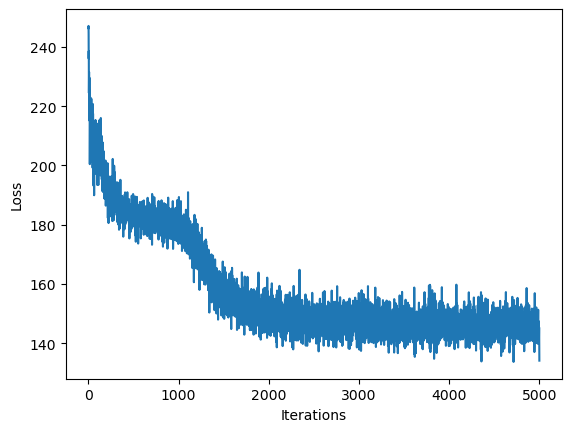

In [93]:
plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")

In [94]:
mean, var = model(X)
y_hat = model.likelihood(mean, var)

print(f"Accuracy: {(y_hat==y).sum()*100/(len(y)) :0.2f}%")

Accuracy: 75.76%
